# Relational Algebra, Groupby Review


*Example from Data100*

Let's start with some toy data about superheroes.  The heroes come from Arrowverse.  In the `first_seen_on` column, `a` stands for Arrow and `f` for The Flash. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pprint

import requests
import json
from pathlib import Path
import yaml
from datetime import datetime

In [2]:
heroes = pd.DataFrame(
    data={'color': ['red', 'green', 'black', 
                    'blue', 'black', 'red'],
          'first_seen_on': ['a', 'a', 'f', 'a', 'a', 'f'],
          'first_season': [2, 1, 2, 3, 3, 1]},
    index=['flash', 'arrow', 'vibe', 
           'atom', 'canary', 'firestorm']
)

identities = pd.DataFrame(
    data={'ego': ['barry allen', 'oliver queen', 'cisco ramon',
                  'ray palmer', 'sara lance', 
                  'martin stein', 'ronnie raymond'],
          'alter-ego': ['flash', 'arrow', 'vibe', 'atom',
                        'canary', 'firestorm', 'firestorm']}
)

teams = pd.DataFrame(
    data={'team': ['flash', 'arrow', 'flash', 'legends', 
                   'flash', 'legends', 'arrow'],
          'hero': ['flash', 'arrow', 'vibe', 'atom', 
                   'killer frost', 'firestorm', 'speedy']})

In [3]:
heroes

,color,first_seen_on,first_season
flash,red,a,2
arrow,green,a,1
vibe,black,f,2
atom,blue,a,3
canary,black,a,3
firestorm,red,f,1


In [4]:
identities

,ego,alter-ego
0,barry allen,flash
1,oliver queen,arrow
2,cisco ramon,vibe
3,ray palmer,atom
4,sara lance,canary
5,martin stein,firestorm
6,ronnie raymond,firestorm


In [5]:
teams

,team,hero
0,flash,flash
1,arrow,arrow
2,flash,vibe
3,legends,atom
4,flash,killer frost
5,legends,firestorm
6,arrow,speedy


### `IsIn` 

An often used operation is a test-of-membership.  The `Series.isin(values)` method returns a boolean array denoting whether each element of `Series` is in `values`.  We can then use the array to subset our DataFrame.  For example, if we wanted to see which rows of `heroes` had `first_season` values in $\{1, 3\}$, we would use: 

In [6]:
heroes[heroes['first_season'].isin([1, 3])]

,color,first_seen_on,first_season
arrow,green,a,1
atom,blue,a,3
canary,black,a,3
firestorm,red,f,1


## Joining Tables on One Column 

Suppose we have another table, `teams`, that classifies superheroes into their respective teams.  Note, that `canary` is not in the `teams` data set and that `killer frost` and `speedy` are not in the original `heroes` set.

For simplicity of the example, we'll convert the index of the `heroes` DataFrame into an explicit column called `hero`.  A careful examination of the `merge` [documentation](http://pandas.pydata.org/pandas-docs/version/0.19.1/generated/pandas.DataFrame.merge.html) will reveal that joining on a mixture of the index and columns is possible. 

In [7]:
heroes['hero'] = heroes.index
heroes

,color,first_seen_on,first_season,hero
flash,red,a,2,flash
arrow,green,a,1,arrow
vibe,black,f,2,vibe
atom,blue,a,3,atom
canary,black,a,3,canary
firestorm,red,f,1,firestorm


In [8]:
teams

,team,hero
0,flash,flash
1,arrow,arrow
2,flash,vibe
3,legends,atom
4,flash,killer frost
5,legends,firestorm
6,arrow,speedy


To understand the different types of join or `merge` in `pandas`, we will use the examples given: 

* Natural join: Keep only rows that match from the data frames, `how='inner'` 
* Full outer join: Keep all rows taht match from both data frames `how='outer'` 
* Left outer join: Include all rows of your data frame `x` and only those from `y` that match, `how='left'` 
* Right outer join: Include all rows of your data frame `y` and only those from `x` that match `how='right'`

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/week8/join-or-merge-in-pandas.png">

### Inner Join 

The inner join returns rows representing the heroes that appear in both data frames. 

In [9]:
pd.merge(heroes, teams, how="inner", on="hero")

,color,first_seen_on,first_season,hero,team
0,red,a,2,flash,flash
1,green,a,1,arrow,arrow
2,black,f,2,vibe,flash
3,blue,a,3,atom,legends
4,red,f,1,firestorm,legends


### Left Join 

The left join returns rows reprsenting `heroes` in the "left" data frame augmented by information found in the `teams` data frame.  

Note, the `team` value for `canary` is `NaN`, representing missing value.*italicized text*

In [10]:
pd.merge(heroes, teams, how="left", on="hero")

,color,first_seen_on,first_season,hero,team
0,red,a,2,flash,flash
1,green,a,1,arrow,arrow
2,black,f,2,vibe,flash
3,blue,a,3,atom,legends
4,black,a,3,canary,NaN
5,red,f,1,firestorm,legends


The right join returns the `hero` values in the `teams` data frame.

In [11]:
pd.merge(heroes, teams, how="right", on="hero")

,color,first_seen_on,first_season,hero,team
0,red,a,2.0,flash,flash
1,green,a,1.0,arrow,arrow
2,black,f,2.0,vibe,flash
3,blue,a,3.0,atom,legends
4,NaN,NaN,NaN,killer frost,flash
5,red,f,1.0,firestorm,legends
6,NaN,NaN,NaN,speedy,arrow


### Outer Join 

An outer join on `hero` will return all heroes found in both the left and right data frames.  Any missing values are filled in with `NaN`

In [12]:
pd.merge(heroes, teams, how="outer", on="hero")

,color,first_seen_on,first_season,hero,team
0,red,a,2.0,flash,flash
1,green,a,1.0,arrow,arrow
2,black,f,2.0,vibe,flash
3,blue,a,3.0,atom,legends
4,black,a,3.0,canary,NaN
5,red,f,1.0,firestorm,legends
6,NaN,NaN,NaN,killer frost,flash
7,NaN,NaN,NaN,speedy,arrow


Note, the join operations can also be run using the following notation. 

In [13]:
heroes.merge(teams, how="outer", on="hero")

,color,first_seen_on,first_season,hero,team
0,red,a,2.0,flash,flash
1,green,a,1.0,arrow,arrow
2,black,f,2.0,vibe,flash
3,blue,a,3.0,atom,legends
4,black,a,3.0,canary,NaN
5,red,f,1.0,firestorm,legends
6,NaN,NaN,NaN,killer frost,flash
7,NaN,NaN,NaN,speedy,arrow


## Example: Legislators 

Let's go back to our legislator example.  We can get information about current committee and committee membership for each legislator.  

First, let's load in this data from the YAML files. 

### From prior lesson

Here's an example: a group of people collected information about US congressional legislators in YAML format.

https://github.com/unitedstates/congress-legislators

Here's one of the data files:

https://github.com/unitedstates/congress-legislators/blob/master/legislators-current.yaml

In [14]:
# import requests
# import json
# from pathlib import Path

legislators_path = 'legislators-current.yaml'
base_url = 'https://theunitedstates.io/congress-legislators/'

def download(url, path):
    """Download the contents of a URL to a local file."""
    path = Path(path) # If path was a string, now it's a Path
    if not path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(url)
        with path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
        
download(base_url + legislators_path, legislators_path)

Downloading... Done!


The code above will download the YAML file storing current legislators information and store it locally.

Then we can just open the local file to look at the information.

Note, we can also see the file in the files directory and look at it.

In [15]:
#import yaml

legislators = yaml.load(open(legislators_path), Loader=yaml.SafeLoader)
len(legislators)

538

In [16]:
#from datetime import datetime

def to_date(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [17]:
leg_df = pd.DataFrame(
    columns=['id', 'first', 'last', 'birthday'],
    data=[[x['id']['bioguide'], 
           x['name']['first'],
           x['name']['last'],
           to_date(x['bio']['birthday'])] for x in legislators])

leg_df['age'] = (datetime.now() - leg_df['birthday']).apply(lambda age: age.days/365)
leg_df.head()

,id,first,last,birthday,age
0,B000944,Sherrod,Brown,1952-11-09,71.994521
1,C000127,Maria,Cantwell,1958-10-13,66.065753
2,C000141,Benjamin,Cardin,1943-10-05,81.098630
3,C000174,Thomas,Carper,1947-01-23,77.794521
4,C001070,Robert,Casey,1960-04-13,64.564384


### New Legislator Data 

Let's load the new data on committees and committee memberships.

In [18]:
comm_path = 'committees-current.yaml'
comm_membership_path = 'committee-membership-current.yaml'
for p in [comm_path, comm_membership_path]:
    download(base_url + p, p)
comms = yaml.load(open(comm_path), Loader=yaml.SafeLoader)
comm_membership = yaml.load(open(comm_membership_path), Loader=yaml.SafeLoader)
print(len(comms), len(comm_membership))

Downloading... Done!
Downloading... Done!
50 229


We can inspect a given committee description. 

In [19]:
comms[0]

{'type': 'house',
 'name': 'House Committee on Agriculture',
 'url': 'https://agriculture.house.gov/',
 'minority_url': 'https://republicans-agriculture.house.gov',
 'thomas_id': 'HSAG',
 'house_committee_id': 'AG',
 'subcommittees': [{'name': 'Forestry',
   'thomas_id': '15',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'Commodity Markets, Digital Assets, and Rural Development',
   'thomas_id': '22',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'General Farm Commodities, Risk Management, and Credit',
   'thomas_id': '16',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'Livestock, Dairy, and Poultry',
   'thomas_id': '29',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'Conservation, Research, and Biotechnology',
   'thomas_id': '14',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-217

### Pull Information into DataFrame 

Let's pull some of this committee information into a DataFrame about committees.

In [20]:
comm_df = pd.DataFrame(
    columns=['name', 'thomas_id', 'type'],
    data=[[c['name'], c['thomas_id'], c['type']] for c in comms]
)
comm_df.head()

,name,thomas_id,type
0,House Committee on Agriculture,HSAG,house
1,House Committee on Appropriations,HSAP,house
2,House Committee on Armed Services,HSAS,house
3,House Committee on Financial Services,HSBA,house
4,House Committee on the Budget,HSBU,house


Next, let's look at the committee membership data.

In [ ]:
#comm_membership

The committee membership is structured about committee id (thomas id). 

In [21]:
comm_membership.keys()

dict_keys(['HSII', 'HSPW', 'HSII13', 'HSII24', 'HSPW05', 'HSPW07', 'HSPW12', 'HSAS', 'HSAS02', 'HSAS28', 'HSAG', 'HSVR', 'HSAG15', 'HSAG29', 'HSVR09', 'HSVR10', 'HSAP', 'HSAP01', 'HSAP02', 'HSAP19', 'HSSY', 'HSAS29', 'HSAS35', 'HSSY16', 'HSIF', 'HSIF02', 'HSIF03', 'HSIF18', 'HSWM', 'HSWM01', 'HSWM02', 'HSWM05', 'HLIG', 'HSAG03', 'HSAG14', 'HSAG16', 'HLIG06', 'HSPW14', 'HSBA', 'HSBA01', 'HSBA04', 'HSBA16', 'HSAP20', 'HSAP23', 'HSPW02', 'HSVR03', 'HSVR08', 'HSIF16', 'HSAP10', 'HSED', 'HSED13', 'HSED14', 'HSGO', 'HSGO06', 'HSII06', 'HSII15', 'HSJU', 'HSGO24', 'HSJU01', 'HSJU08', 'JSEC', 'HSAS25', 'HSAS26', 'HSII10', 'HSIF17', 'HSJU03', 'HSAG22', 'HSAS03', 'HSPW13', 'HSBU', 'HSJU10', 'JSTX', 'HSIF14', 'HSFA', 'HSFA05', 'HSFA16', 'HSSY21', 'HSSY20', 'HSAP06', 'HSAP07', 'HSRU', 'HSED02', 'HSGO05', 'HSAP04', 'HSHM', 'HSHM05', 'HSJU05', 'HSFA14', 'HSHA', 'JSLC', 'JSPR', 'HSWM03', 'HSWM04', 'HSAP18', 'HSSM', 'HSSM24', 'HSSM27', 'HSWM06', 'HSFA13', 'HSFA17', 'HSAP15', 'HSHA08', 'HSRU04', 'HSED10

We can look at the membership of a certain committee.   

In [ ]:
#comm_membership['HSAG']

In [22]:
# or look at a single member 
comm_membership['HSAG'][5]

{'name': 'James P. McGovern',
 'party': 'minority',
 'rank': 3,
 'bioguide': 'M000312'}

### Create DataFrame linking Committee with Members 

Next, we can create a DataFrame that links committee id with legislator's ids. 

In [23]:
member_df = pd.DataFrame(
    columns=['comm_id', 'leg_id'],
    data=[[c, m['bioguide']] for c, members in comm_membership.items() for m in members]
)
member_df.head()

,comm_id,leg_id
0,HSII,W000821
1,HSII,G000551
2,HSII,L000564
3,HSII,N000179
4,HSII,W000804


### Merge DataFrames

Now we can merge this `member_df` with the `comm_df`

In [24]:
member_comm = member_df.merge(comm_df, left_on='comm_id', right_on='thomas_id')
member_comm.head()

,comm_id,leg_id,name,thomas_id,type
0,HSII,W000821,House Committee on Natural Resources,HSII,house
1,HSII,G000551,House Committee on Natural Resources,HSII,house
2,HSII,L000564,House Committee on Natural Resources,HSII,house
3,HSII,N000179,House Committee on Natural Resources,HSII,house
4,HSII,W000804,House Committee on Natural Resources,HSII,house


In [25]:
member_comm2 = pd.merge(member_df, comm_df, left_on='comm_id', right_on='thomas_id')
member_comm2.head()

,comm_id,leg_id,name,thomas_id,type
0,HSII,W000821,House Committee on Natural Resources,HSII,house
1,HSII,G000551,House Committee on Natural Resources,HSII,house
2,HSII,L000564,House Committee on Natural Resources,HSII,house
3,HSII,N000179,House Committee on Natural Resources,HSII,house
4,HSII,W000804,House Committee on Natural Resources,HSII,house


In [26]:
comm_sizes = member_comm['name'].value_counts()
comm_sizes.head()

name
House Committee on Transportation and Infrastructure    65
House Committee on Appropriations                       61
House Committee on Armed Services                       59
House Committee on Agriculture                          54
House Committee on Foreign Affairs                      53
Name: count, dtype: int64

Alternatively, we can merge the member_comm with the legislators data frame.

In [27]:
df = member_comm.merge(leg_df, left_on='leg_id', right_on='id')
df.head()

,comm_id,leg_id,name,thomas_id,type,id,first,last,birthday,age
0,HSII,W000821,House Committee on Natural Resources,HSII,house,W000821,Bruce,Westerman,1967-11-18,56.961644
1,HSPW,W000821,House Committee on Transportation and Infrastr...,HSPW,house,W000821,Bruce,Westerman,1967-11-18,56.961644
2,HSII,G000551,House Committee on Natural Resources,HSII,house,G000551,Raúl,Grijalva,1948-02-19,76.720548
3,HSED,G000551,House Committee on Education and the Workforce,HSED,house,G000551,Raúl,Grijalva,1948-02-19,76.720548
4,HSII,L000564,House Committee on Natural Resources,HSII,house,L000564,Doug,Lamborn,1954-05-24,70.457534


Now we can look at things like, what is the mean age for members of each committee.

In [28]:
comm_ages = df['age'].groupby(df['name']).mean().sort_values()
comm_ages.head()

name
House Committee on Oversight and Accountability                                                                  53.361294
House Committee on Homeland Security                                                                             53.779110
House Select Committee on the Strategic Competition Between the United States and the Chinese Communist Party    53.787443
House Committee on Small Business                                                                                53.978714
House Permanent Select Committee on Intelligence                                                                 54.188603
Name: age, dtype: float64

Or, the overall mean age for all legislators. 

In [29]:
leg_df['age'].mean()

60.12154096857972

### Calculate number of committees each legislator is on

Let's calculate the number of committees a given legislator is on. 

In [30]:
member_count = member_df['leg_id'].value_counts().to_frame().reset_index()
member_count.columns = ['id', 'num_comms']
member_count.head()

,id,num_comms
0,F000463,22
1,R000122,21
2,C001088,20
3,W000437,20
4,B001236,19


We can merge the legislator Data Frame, with the `member_count` DataFrame to have the name, age, and number of committees for each legislator. 

In [31]:
df = leg_df.merge(member_count, left_on='id', right_on='id')
df.head()

,id,first,last,birthday,age,num_comms
0,B000944,Sherrod,Brown,1952-11-09,71.994521,13
1,C000127,Maria,Cantwell,1958-10-13,66.065753,13
2,C000141,Benjamin,Cardin,1943-10-05,81.098630,18
3,C000174,Thomas,Carper,1947-01-23,77.794521,12
4,C001070,Robert,Casey,1960-04-13,64.564384,9


Finally, we can plot the age of a legislator versus the number of committees they serve on. 

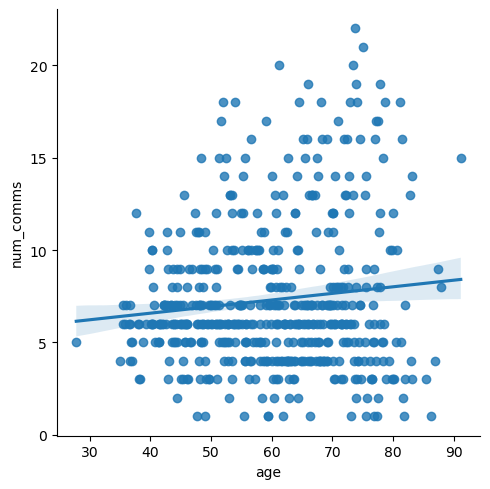

In [32]:
sns.lmplot(x='age', y='num_comms', data=df, fit_reg=True);

# Review of Grouping Data 

For most of the course so far, we have been working with a single data file at a time. 

Let's look at how we can do grouping within a single data set and also working across multiple data sets.

In [33]:
df = pd.read_csv("elections.csv")
df.head()

,Candidate,Party,Perc,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss


## Grouping a Series by a Series 

Let's group the 'Perc' Series by the `Party` Series. We have seen a call to [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do this. 

In [34]:
percent_grouped_by_party = df['Perc'].groupby(df['Party'])
type(percent_grouped_by_party)

pandas.core.groupby.generic.SeriesGroupBy

As we see, `percent_grouped_by_party` is **NOT** a DataFrame, Series, or Index. Instead, it's a `SeriesGroupBy` object. A `SeriesGroupBy` consists of `groups`, one for each of the distinct values of the `Party` column. If we ask to see these groups, we'll be able to see which indices in the original DataFrame correspond to each group.

In [35]:
#import pprint
pprint.pprint(percent_grouped_by_party.groups)

{'Democratic': [1, 4, 6, 7, 10, 13, 15, 17, 19, 21], 'Independent': [2, 9, 12], 'Republican': [0, 3, 5, 8, 11, 14, 16, 18, 20, 22]}


The `percent_grouped_by_party` object is capable of making computations across all these groups.  

For example, if we call the `mean` method of the `SeriesGroupBy` class.  We'll get a new `Series` containing the mean of the "Democratic" `Series`, the mean of the "Independent" `Series`, and the mean of the "Republican" `Series`.

In [36]:
percent_grouped_by_party.mean()

Party
Democratic     46.53
Independent    11.30
Republican     47.86
Name: Perc, dtype: float64

We can iterate over a `SeriesGroupBy` object.  Each element is a pair of `(name, group)`, where `name` is a String label for the group and `group` is a `Series` corresponding to all the values from that group. 

In [37]:
from IPython.display import display  # like print, but for complex objects

for name, group in percent_grouped_by_party:
    print('Name:', name)
    print(type(group))
    display(group.head())
    print('\n')

Name: Democratic
<class 'pandas.core.series.Series'>


1     41.0
4     37.6
6     45.6
7     43.0
10    49.2
Name: Perc, dtype: float64



Name: Independent
<class 'pandas.core.series.Series'>


2      6.6
9     18.9
12     8.4
Name: Perc, dtype: float64



Name: Republican
<class 'pandas.core.series.Series'>


0     50.7
3     58.8
5     53.4
8     37.4
11    40.7
Name: Perc, dtype: float64

## Grouping a Series by Multiple Series 

We can also group a Series by multiple Series.  For example, suppose we want to track all combinations of `{'Democratic', 'Republican', and 'Independent'}` and `{'win', 'loss'}`. 

In [38]:
percent_grouped_by_party_and_result = df['Perc'].groupby([df['Party'], df['Result']])
percent_grouped_by_party_and_result.groups

{('Democratic', 'loss'): [1, 4, 6, 13, 15, 21], ('Democratic', 'win'): [7, 10, 17, 19], ('Independent', 'loss'): [2, 9, 12], ('Republican', 'loss'): [8, 11, 18, 20], ('Republican', 'win'): [0, 3, 5, 14, 16, 22]}

In [39]:
pprint.pprint(percent_grouped_by_party_and_result.groups)

{('Democratic', 'loss'): [1, 4, 6, 13, 15, 21], ('Democratic', 'win'): [7, 10, 17, 19], ('Independent', 'loss'): [2, 9, 12], ('Republican', 'loss'): [8, 11, 18, 20], ('Republican', 'win'): [0, 3, 5, 14, 16, 22]}


Given this groupby object, we can compute the average percentage earned every time each of the parties won and lost the presidential election. We see that at least between 1980 and 2016, the Republicans have typically lost and won their elections by wider margins.

In [40]:
party_result_mean = percent_grouped_by_party_and_result.mean()
party_result_mean

Party        Result
Democratic   loss      44.850000
             win       49.050000
Independent  loss      11.300000
Republican   loss      42.750000
             win       51.266667
Name: Perc, dtype: float64

The careful reader will note that the returned object looks a little funny. It seems to have two indexes! If we check the type of this object, we'll see it's just a regular Series.

In [41]:
type(party_result_mean)

pandas.core.series.Series

However if we request to see the index of this Series, we see that it is a "MultiIndex", which is a special type of index used for data that is indexed in two or more ways.

In [42]:
party_result_mean.index

MultiIndex([( 'Democratic', 'loss'),
            ( 'Democratic',  'win'),
            ('Independent', 'loss'),
            ( 'Republican', 'loss'),
            ( 'Republican',  'win')],
           names=['Party', 'Result'])

Selecting an element of a multi-index gives you a series with just an index.

In [43]:
party_result_mean['Republican']

Result
loss    42.750000
win     51.266667
Name: Perc, dtype: float64

Or, you can select both levels at once. 

In [44]:
party_result_mean['Democratic', 'win']

49.05

## Grouping a DataFrame by a Series

We can also group an entire dataframe by one or more Series. The result is a DataFrameGroupBy object:

In [45]:
everything_grouped_by_party = df.groupby('Party')
everything_grouped_by_party

As in our previous example, this object contains three group objects, one for each party label. 

In [46]:
pprint.pprint(everything_grouped_by_party.groups)

{'Democratic': [1, 4, 6, 7, 10, 13, 15, 17, 19, 21], 'Independent': [2, 9, 12], 'Republican': [0, 3, 5, 8, 11, 14, 16, 18, 20, 22]}


Just as with SeriesGroupBy objects, we can iterate over a DataFrameGroupBy object to understand what is effectively inside.

In [47]:
for n, g in everything_grouped_by_party:
    print('name:', n)
    display(g.head())

name: Democratic


,Candidate,Party,Perc,Year,Result
1,Carter,Democratic,41.0,1980,loss
4,Mondale,Democratic,37.6,1984,loss
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
10,Clinton,Democratic,49.2,1996,win


name: Independent


,Candidate,Party,Perc,Year,Result
2,Anderson,Independent,6.6,1980,loss
9,Perot,Independent,18.9,1992,loss
12,Perot,Independent,8.4,1996,loss


name: Republican


,Candidate,Party,Perc,Year,Result
0,Reagan,Republican,50.7,1980,win
3,Reagan,Republican,58.8,1984,win
5,Bush,Republican,53.4,1988,win
8,Bush,Republican,37.4,1992,loss
11,Dole,Republican,40.7,1996,loss


And just like SeriesGroupBy objects, we can apply methods like mean to compute the mean of each group. Since a DataFrameGroupBy is linked to the entire original dataframe (instead of to a single column from the dataframe), we calculate a mean for every numerical column. 

In [48]:
everything_grouped_by_party[['Perc', 'Year']].mean()

,Perc,Year
Party,,
Democratic,46.53,1998.000000
Independent,11.30,1989.333333
Republican,47.86,1998.000000


## Grouping a DataFrame by MultipleSeries

DataFrames may also be grouped by multiple series at once. For example, we can repeat what we did with a Series above and group the entire DataFrame by Party and Result. After aggregation, we end up with a DataFrame that has a MultiIndex.

In [49]:
everything_grouped_by_party_and_result=df.groupby([df['Party'], df['Result']])
everything_grouped_by_party_and_result.max()

Candidate  Perc  Year
Party       Result                      
Democratic  loss     Mondale  48.4  2016
            win        Obama  52.9  2012
Independent loss       Perot  18.9  1996
Republican  loss      Romney  47.2  2012
            win        Trump  58.8  2016

The resulting DataFrame above is pretty strange. We'll observe that Walter Mondale did not run for office in 2016! Make sure you understand why this is happening, as this sort of thing is a common mistake made by people who don't fully understand how pandas works.

**Question:** How do you generate a table like the one above, except that each entry should represent all attributes of the candidate who got the maximum vote in that category? For example, the Republican Win category should feature Reagan in 1984 with 58.8% of the vote. *Hint:* Try sorting.

In [50]:
(df.sort_values("Perc", ascending=False).
    groupby([df['Party'], df['Result']]).
    first())

Candidate        Party  Perc  Year Result
Party       Result                                          
Democratic  loss        Gore   Democratic  48.4  2000   loss
            win        Obama   Democratic  52.9  2008    win
Independent loss       Perot  Independent  18.9  1992   loss
Republican  loss      Romney   Republican  47.2  2012   loss
            win       Reagan   Republican  58.8  1984    win

## Custom Aggregation Functions 

As described above, both `SeriesGroupBy` and `DataFrameGroupBy` objects have lots of handy methods for computing aggregate values for groups, e.g.

In [51]:
percent_grouped_by_party.min()

Party
Democratic     37.6
Independent     6.6
Republican     37.4
Name: Perc, dtype: float64

In [52]:
everything_grouped_by_party['Perc'].median()

Party
Democratic     48.25
Independent     8.40
Republican     47.55
Name: Perc, dtype: float64

It turns out that all of these GroupBy methods are just shorthand for a more powerful and universal method of our GroupBy objects called `agg`. For example, `.min()` is just shorthand for `.agg(min)`, where `min` refers to the function `min`.

In [53]:
percent_grouped_by_party.agg(min)

Party
Democratic     37.6
Independent     6.6
Republican     37.4
Name: Perc, dtype: float64

Naturally, we can define our own custom aggregation functions. For example, the function below returns the first item in a series.

In [54]:
def average_of_first_and_last(series):
    return (series.iloc[0] + series.iloc[-1])/2

We can supply this function as a custom aggregation function for each series. As you can see, nuisance columns are automatically removed.

In [55]:
percent_grouped_by_party_and_result.agg(average_of_first_and_last)

Party        Result
Democratic   loss      44.60
             win       47.05
Independent  loss       7.50
Republican   loss      42.30
             win       48.40
Name: Perc, dtype: float64

`agg` is fundamental to our use of GroupBy objects. Indeed, you will rarely call `groupby` without also calling `agg`, at least implicitly. We can summarize the grouping process with the following diagram, inspired by a similar diagram created by DS100 instructor Joey Gonzales. Diagram source at [this link](https://docs.google.com/presentation/d/1FrYg6yd6B-CIgfWLWm4W8vBhfmJ6Qt9dKkN-mlN5AKU/edit#slide=id.g4131093782_0_40).

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/week8/groupby_overview.png">

The result of calling `groupby` then `agg` on a `Series` is also a `Series`, and the result of calling `groupby` then `agg` on a `DataFrame` is also typically a `DataFrame`, though there are exceptions, e.g. if you use the aggregation function `size`, you will get back a `Series`.

In [56]:
def list_of_first_and_last(series):
    return [series.iloc[0], series.iloc[-1]]

In [57]:
everything_grouped_by_party.agg(list_of_first_and_last)

,Candidate,Perc,Year,Result
Party,,,,
Democratic,"[Carter, Clinton]","[41.0, 48.2]","[1980, 2016]","[loss, loss]"
Independent,"[Anderson, Perot]","[6.6, 8.4]","[1980, 1996]","[loss, loss]"
Republican,"[Reagan, Trump]","[50.7, 46.1]","[1980, 2016]","[win, win]"


## Using Groups to Filter Datasets 

In [58]:
everything_grouped_by_candidate = df.groupby('Candidate')
everything_grouped_by_candidate.filter(lambda subframe: subframe["Year"].max() > 2000)

,Candidate,Party,Perc,Year,Result
5,Bush,Republican,53.4,1988,win
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
10,Clinton,Democratic,49.2,1996,win
14,Bush,Republican,47.9,2000,win
15,Kerry,Democratic,48.3,2004,loss
16,Bush,Republican,50.7,2004,win
17,Obama,Democratic,52.9,2008,win
18,McCain,Republican,45.7,2008,loss
19,Obama,Democratic,51.1,2012,win


In [59]:
everything_grouped_by_year = df.groupby('Year')

In [60]:
everything_grouped_by_year.filter(lambda subframe: subframe["Perc"].sum() < 97)

,Candidate,Party,Perc,Year,Result
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
13,Gore,Democratic,48.4,2000,loss
14,Bush,Republican,47.9,2000,win
21,Clinton,Democratic,48.2,2016,loss
22,Trump,Republican,46.1,2016,win


A visual picture of how filtering works is shown below.

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/week8/filter_overview.png">

## Using `isin` for filtering

This isn't actually related to `groupby` at all, but it seemed natural to bring it up here.

Sometimes we want to restrict our attention to only rows where certain values appear. For example, we saw last time how we'd look at only rows that contain "Democratic" candidates.

In [61]:
df[df["Party"] == "Democratic"]

,Candidate,Party,Perc,Year,Result
1,Carter,Democratic,41.0,1980,loss
4,Mondale,Democratic,37.6,1984,loss
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
10,Clinton,Democratic,49.2,1996,win
13,Gore,Democratic,48.4,2000,loss
15,Kerry,Democratic,48.3,2004,loss
17,Obama,Democratic,52.9,2008,win
19,Obama,Democratic,51.1,2012,win
21,Clinton,Democratic,48.2,2016,loss


Suppose we wanted to filter such that all Republicans and Democrats appeared. One ugly way to do this would be `df[(df["Party"] == "Democratic") | (df["Party"] == "Republican")]`. However, a better idea is to use the `isin` method.

In [62]:
df[(df["Party"] == "Democratic") | (df["Party"] == "Republican")]


,Candidate,Party,Perc,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
10,Clinton,Democratic,49.2,1996,win
11,Dole,Republican,40.7,1996,loss


In [63]:
df[df["Party"].isin(["Republican", "Democratic"])]

,Candidate,Party,Perc,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
10,Clinton,Democratic,49.2,1996,win
11,Dole,Republican,40.7,1996,loss


## Pivot Tables 

Recall from before that we were able to group the "Perc" Series by the "Party" and "Result" Series, allowing us to understand the average vote earned by each party under each election result.

In [64]:
percent_grouped_by_party_and_result = df['Perc'].groupby([df['Party'], df['Result']])
percent_grouped_by_party_and_result.mean()

Party        Result
Democratic   loss      44.850000
             win       49.050000
Independent  loss      11.300000
Republican   loss      42.750000
             win       51.266667
Name: Perc, dtype: float64

Because we called `groupby` on a Series, the result of our aggregation operation was also a Series. However, I believe this data is more naturally expressed in a tabular format, with Party as the rows, and Result as the columns. The `pivot_table` operation is the natural way to achieve this data format.

In [65]:
df_pivot = df.pivot_table(
    index='Party', # the rows (turned into index)
    columns='Result', # the column values
    values='Perc', # the field(s) to processed in each group
    aggfunc=np.mean, # group operation
)
df_pivot.head()

Result,loss,win
Party,,
Democratic,44.85,49.050000
Independent,11.30,NaN
Republican,42.75,51.266667


The basic idea is that you specify a Series to be the `index` (i.e. rows) and a Series to be the `columns`. The data in the specified `values` is then grouped by all possible combinations of values that occur in the `index` and `columns` Series. These groups are then aggregated using the `aggfunc`, and arranged into a table that matches the requested `index` and `columns`. The diagram below summarizes how pivot tables are formed. (Diagram inspired by Joey Gonzales). Diagram source at [this link](https://docs.google.com/presentation/d/1FrYg6yd6B-CIgfWLWm4W8vBhfmJ6Qt9dKkN-mlN5AKU/edit#slide=id.g4131093782_0_89).

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/week8/pivot_table_overview.png">

For more on pivot tables, see [this excellent tutorial](http://pbpython.com/pandas-pivot-table-explained.html) by Chris Moffitt.